## Natural language processing to classify a resume into a job category 
### Read reasumes in pdf format using pdf2image ocr tool and convert it to  
### PIL image, then use pytesseract.image_to_string to convert the image into strings objects.
### Then, use natural language processing tools such as nltk stopwords, regex, string replace 
### to get important words from the string.
### We also remove prefix and suffix using PorterStemmer in nltk library.
### Then, we use CountVectorizer method and TfidfVectorizer method from sci-kit learn
### to create a independent feature vector. 
### We use explore NaiveBayes model to train the data set.
### Compute confusion matrix.

In [1]:
# Import libraries
import platform
from tempfile import TemporaryDirectory
from pathlib import Path
 
import pytesseract
from pdf2image import convert_from_path
from PIL import Image

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords   # removes a, an, the, but, since, he, she, they etc
from nltk.stem import PorterStemmer #removing s or ed in helps helped

#Different ways in NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


In [2]:
#write a function that reads pdf file and convert it ito image and then into text
#text as a string is output

def ConvertPDFtoText(PDF_file):
    Ans=''
    temp=''
    image_file_list = []
    # Read in the PDF file at 500 DPI
    pdf_pages = convert_from_path(PDF_file, 500)
    print(pdf_pages)  
    for pil_image in pdf_pages:
        print(pil_image)
        #pil_image.show()
        #Recognize text as string in PIL image using pytesserct
        temp = pytesseract.image_to_string(pil_image)
        # In many PDFs, at line ending, if a word can't be written fully, a 'hyphen' is added.
        # To remove this, we replace every '-\n' to ''.
        temp = temp.replace("-\n", "")
        Ans = Ans + temp
        
    return Ans

#Ans=ConvertPDFtoText(r"12467531.pdf")
#print(Ans)

In [19]:
# test example "data/AGRICULTURE/ '282498.pdf', '825973.pdf'
out_directory = Path("~").expanduser() 
PDF_file = Path(r"data/AGRICULTURE/282498.pdf")
print(PDF_file)
Ans=ConvertPDFtoText(PDF_file)
print(Ans)


data/AGRICULTURE/282498.pdf
[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x162752D10>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x162752EC0>]
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x162752D10>
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x162752EC0>
JESSICA CLAIRE

,, 100 Montgomery St. 10th Floor  H: (555) 432-1000 # C: # resumesample@example.com Date of Birth: «

India: ¢ : single: «

WorK HISTORY

FEMA Vaccine Distribution, 04/2021 - 08/2021

City Of Cedar Hill 4€“ Cedar Hill, ,

Average hours/ week: 50-60
e Used digital mapping to analyze population data and organize community outreach.
e Used GIS software to navigate and complete daily operations.
e Worked flexible hours; evening, weekend, and holidays.

e Worked with a team to conduct outreach and community engagement.

Completed training on Strategic Marketing and Team Efficiency.

Agriculture/Environmental Volunteer, 10/2018 - 03/20

In [186]:
#Create a data frame with 

jobname = os.listdir("data")
print(jobname,"\n")
parentdir ="data"

df = pd.DataFrame()
Category=[]
Resume_Content=[]

for job in jobname:
    if job == '.DS_Store':       
            continue
    pathdir = parentdir + "/" + job
    allfiles = os.listdir(pathdir)
    print(allfiles,'\n')
    
    for file in allfiles:
        if file == '.DS_Store':       
            continue
        filename = pathdir + "/" + file
        temp_text = ""
        temp_text = ConvertPDFtoText(filename)
        Resume_Content.append(temp_text)
        Category.append(job)
        

df['Category'] = Category
df['Resume_Content'] = Resume_Content

#df        
        

['AGRICULTURE', 'ARTS', 'MACHINE-LEARNING-ENGINEER', '.DS_Store', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'CHEF', 'HEALTHCARE', 'PUBLIC-RELATIONS', 'DOCTOR', 'DENTAL-HYGIENIST', 'DATA-SCIENTIST', 'AVIATION', 'BANKING', 'ACCOUNTANT', 'HR', 'CONSTRUCTION', 'FINANCE', 'FITNESS', 'APPAREL', 'ADVOCATE', 'TEACHER', 'ENGINEERING', 'AUTOMOBILE'] 

['282498.pdf', '825973.pdf', '860292.pdf', '199658.pdf', '267935.pdf', '571864.pdf', '158988.pdf', '237217.pdf', '184307.pdf', '322838.pdf'] 

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F0E50>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F3520>]
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F0E50>
<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F3520>
[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F01C0>, <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=4132x5848 at 0x16B1F2EF0>]
<PIL.PpmImagePlugin.PpmImageFile im

In [25]:
#Save resume data into csv file and read the csv file for subsequent analysis
df.to_csv("data_resume_extracted_from_pdf.csv",index=False)

df = pd.read_csv("data_resume_extracted_from_pdf.csv")

df

,Category,Resume_Content
0,AGRICULTURE,"JESSICA CLAIRE\n\n,, 100 Montgomery St. 10th F..."
1,AGRICULTURE,SUMMARY\n\nHIGHLIGHTS\n\nACCOMPLISHMENTS\n\nEX...
2,AGRICULTURE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc..."
3,AGRICULTURE,SUMMARY\n\nHIGHLIGHTS\n\nACCOMPLISHMENTS\n\nEX...
4,AGRICULTURE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc..."
...,...,...
235,AUTOMOBILE,SUMMARY\n\nSKILLS\n\nEXPERIENCE\n\n09/2020 to ...
236,AUTOMOBILE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc..."
237,AUTOMOBILE,"JESSICA CLAIRE\n\n,, 100 Montgomery St. 10th F..."
238,AUTOMOBILE,CAREER OVERVIEW |\n\nCORE STRENGTHS\n\nACCOMPL...


In [138]:
#Let's use LabelEncoder for job category variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
LabelEncodedY = le.fit_transform(df["Category"])
print(LabelEncodedY)
#np.ravel(LabelEncodedY, order='C')
lePD = pd.DataFrame(LabelEncodedY, columns=["LE-Category"] )

#merge to original data frame
df_new = df.join(lePD)

#Let's also use OneHotEncoder method to encode the categorical data such as Job category
#Create independent categorical variable for each category
from sklearn.preprocessing import OneHotEncoder

label = "Category"

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ftarray =  ohe.fit_transform( df[[label]] ) 
print(ohe.get_feature_names() )
encoded_names = ohe.get_feature_names()

N=len(ftarray[0][:])
print(N)

stringlabel=[]
for i in range(0,N):
    name = encoded_names[i].replace("x0",'Category')
    stringlabel.append( name )

print(stringlabel)
#create a one hot encoded data frame which we want to merge to original data frame    
ftPD = pd.DataFrame(ftarray, columns=stringlabel )

#merge to original data frame
df_new = df_new.join(ftPD)    
    
display(df_new)
print( '\n', df_new.isnull().sum())    

#Category 
#Resume_Content 

[ 2  2  2  2  2  2  2  2  2  2  4  4  4  4  4  4  4  4  4  4 20 20 20 20
 20 20 20 20 20 20 22 22 22 22 22 22 22 22 22 22 10 10 10 10 10 10 10 10
 10 10 13 13 13 13 13 13 13 13 13 13  8  8  8  8  8  8  8  8  8  8 18 18
 18 18 18 18 18 18 18 18 21 21 21 21 21 21 21 21 21 21 14 14 14 14 14 14
 14 14 14 14 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  0  0  0  0
  0  0  0  0  0  0 19 19 19 19 19 19 19 19 19 19  9  9  9  9  9  9  9  9
  9  9 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17  3  3
  3  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  1 23 23 23 23 23 23
 23 23 23 23 15 15 15 15 15 15 15 15 15 15  5  5  5  5  5  5  5  5  5  5]
['x0_ACCOUNTANT' 'x0_ADVOCATE' 'x0_AGRICULTURE' 'x0_APPAREL' 'x0_ARTS'
 'x0_AUTOMOBILE' 'x0_AVIATION' 'x0_BANKING' 'x0_CHEF' 'x0_CONSTRUCTION'
 'x0_CONSULTANT' 'x0_DATA-SCIENTIST' 'x0_DENTAL-HYGIENIST'
 'x0_DIGITAL-MEDIA' 'x0_DOCTOR' 'x0_ENGINEERING' 'x0_FINANCE' 'x0_F

/Users/amitkumar/miniconda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Category,Resume_Content,LE-Category,Category_ACCOUNTANT,Category_ADVOCATE,Category_AGRICULTURE,Category_APPAREL,Category_ARTS,Category_AUTOMOBILE,Category_AVIATION,...,Category_DOCTOR,Category_ENGINEERING,Category_FINANCE,Category_FITNESS,Category_HEALTHCARE,Category_HR,Category_MACHINE-LEARNING-ENGINEER,Category_PUBLIC-RELATIONS,Category_SALES,Category_TEACHER
0,AGRICULTURE,"JESSICA CLAIRE\n\n,, 100 Montgomery St. 10th F...",2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AGRICULTURE,SUMMARY\n\nHIGHLIGHTS\n\nACCOMPLISHMENTS\n\nEX...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AGRICULTURE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc...",2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AGRICULTURE,SUMMARY\n\nHIGHLIGHTS\n\nACCOMPLISHMENTS\n\nEX...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AGRICULTURE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc...",2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,AUTOMOBILE,SUMMARY\n\nSKILLS\n\nEXPERIENCE\n\n09/2020 to ...,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,AUTOMOBILE,"JESSICA CLAIRE\n\nMontgomery Street, San Franc...",5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,AUTOMOBILE,"JESSICA CLAIRE\n\n,, 100 Montgomery St. 10th F...",5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,AUTOMOBILE,CAREER OVERVIEW |\n\nCORE STRENGTHS\n\nACCOMPL...,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Category                              0
Resume_Content                        0
LE-Category                           0
Category_ACCOUNTANT                   0
Category_ADVOCATE                     0
Category_AGRICULTURE                  0
Category_APPAREL                      0
Category_ARTS                         0
Category_AUTOMOBILE                   0
Category_AVIATION                     0
Category_BANKING                      0
Category_CHEF                         0
Category_CONSTRUCTION                 0
Category_CONSULTANT                   0
Category_DATA-SCIENTIST               0
Category_DENTAL-HYGIENIST             0
Category_DIGITAL-MEDIA                0
Category_DOCTOR                       0
Category_ENGINEERING                  0
Category_FINANCE                      0
Category_FITNESS                      0
Category_HEALTHCARE                   0
Category_HR                           0
Category_MACHINE-LEARNING-ENGINEER    0
Category_PUBLIC-RELATIONS             

In [139]:
# Text Pre-processing using "stopwords" from NLTK corpus library

# Regex module to remove unwatted objects from strings such as new line, numbers,
import re
import string 
df_main = df_new.copy()

pattern = '[0-9]'
string1 = "Hello!Amit12,NLP2020"
NewColumn =[]

for i in range(len(df_new['Resume_Content'])):
    mystring = df_new.iloc[i,1]
    newstring_list = []
    for j in mystring:
        if j.isalpha():
            newstring_list.append(j)
        else:
            newstring_list.append(" ")
    newstring = "".join(newstring_list)
    NewColumn.append(newstring)      
    
print(NewColumn[0])
                                        
df_main['Resume_Content'] = NewColumn

#We'll  remove very common words, ('the', 'a', etc..)
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english') + list(string.ascii_lowercase) + ['st', 'th']
#print(STOPWORDS)

df_main['Resume_Content'] = df_main['Resume_Content'].apply(
    lambda x: " ".join( str(word + " ") 
    for word in (x.lower()).split() 
    if word not in STOPWORDS )  )

print("\n")
df_main.iloc[0,1]


#We will also remove prefix and suffix using PorterStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df_main['Resume_Content'] = df_main['Resume_Content'].apply(
                        lambda x: " ".join( str( ps.stem(word) + " ") 
                        for word in (x.lower()).split() ) )
    
    
df_main.iloc[0,1]
                                           
                                           

JESSICA CLAIRE         Montgomery St    th Floor  H                   C    resumesample example com Date of Birth     India      single     WorK HISTORY  FEMA Vaccine Distribution                     City Of Cedar Hill     Cedar Hill     Average hours  week        e Used digital mapping to analyze population data and organize community outreach  e Used GIS software to navigate and complete daily operations  e Worked flexible hours  evening  weekend  and holidays   e Worked with a team to conduct outreach and community engagement   Completed training on Strategic Marketing and Team Efficiency   Agriculture Environmental Volunteer                    Peace Corps  The Gambia     City  STATE  Average hours day     e Lived in a rural community providing expertise with Agriculture  Health  and Education  e Worked on language and cultural integration  as well as counterpart and community capacity building  e Planted     trees with community and Dept  of Forestry to combat deforestation and pro

'jessica  clair  montgomeri  floor  resumesampl  exampl  com  date  birth  india  singl  work  histori  fema  vaccin  distribut  citi  cedar  hill  cedar  hill  averag  hour  week  use  digit  map  analyz  popul  data  organ  commun  outreach  use  gi  softwar  navig  complet  daili  oper  work  flexibl  hour  even  weekend  holiday  work  team  conduct  outreach  commun  engag  complet  train  strateg  market  team  effici  agricultur  environment  volunt  peac  corp  gambia  citi  state  averag  hour  day  live  rural  commun  provid  expertis  agricultur  health  educ  work  languag  cultur  integr  well  counterpart  commun  capac  build  plant  tree  commun  dept  forestri  combat  deforest  provid  sustain  sourc  incom  natur  resourc  nutrit  divers  plan  facilit  larg  commun  base  project  facilit  lesson  discuss  school  commun  group  use  paca  method  park  mainten  worker  three  river  park  district  citi  state  averag  hour  week  maintain  routin  landscap  sched

In [182]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the data) for use with NLP machine learning models
X = df_main.Resume_Content
y = df_main.iloc[:,2]
print(X.shape, type(X))
print(y.shape,type(y) )

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train) )
print(X_test.shape)
print(y_test.shape)
print(y_test.to_numpy())
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()
y_full = y.to_numpy()


(240,) <class 'pandas.core.series.Series'>
(240,) <class 'pandas.core.series.Series'>
(180,) <class 'pandas.core.series.Series'>
(180,) <class 'pandas.core.series.Series'>
(60,)
(60,)
[15  3 21 14 23  2 14 20 16  5  5  6  3 22  1 23 11  8 23 12 11 11 10 14
  5  5  8 17 22 21  0 15  1 21  9 22 22  4  9 11  4 14 13 22  8 22  4 20
  2 16 18 17  0 13 14 20  4  6  7 18]


In [183]:
'''
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
'''
from sklearn.model_selection import GridSearchCV 
#from sklearn.model_selection import RandomizedSearchCV

#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues): 
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    ims = ax.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    plt.colorbar(ims, ax=ax)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=90)
    plt.yticks(tick_marks, LabelS)
    for i  in range(0,24):
        for j in range(0,24):
            plt.text(i,j,cnf_mat[i][j])

#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=np.linspace(0,23,24))
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['AGRICULTURE',
                                           'ARTS', 'MACHINE-LEARNING-ENGINEER', 
                                           'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'CHEF', 'HEALTHCARE', 
                                           'PUBLIC-RELATIONS', 'DOCTOR', 'DENTAL-HYGIENIST', 
                                           'DATA-SCIENTIST', 'AVIATION', 'BANKING', 'ACCOUNTANT', 
                                           'HR', 'CONSTRUCTION', 'FINANCE', 'FITNESS', 'APPAREL', 
                                           'ADVOCATE', 'TEACHER', 'ENGINEERING', 'AUTOMOBILE'])
    
    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[ 2  2  2  2  2  2  2  2  2  2  4  4  4  4  4  4  4  4  4  4 20 20 20 20
 20 20 20 20 20 20 22 22 22 22 22 22 22 22 22 22 10 10 10 10 10 10 10 10
 10 10 13 13 13 13 13 13 13 13 13 13  8  8  8  8  8  8  8  8  8  8 18 18
 18 18 18 18 18 18 18 18 21 21 21 21 21 21 21 21 21 21 14 14 14 14 14 14
 14 14 14 14 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  0  0  0  0
  0  0  0  0  0  0 19 19 19 19 19 19 19 19 19 19  9  9  9  9  9  9  9  9
  9  9 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17  3  3
  3  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  1 23 23 23 23 23 23
 23 23 23 23 15 15 15 15 15 15 15 15 15 15  5  5  5  5  5  5  5  5  5  5]
[ 2  2  2  2  2  2  2  2  2  2  4 18  4  4  4  4  4  4 21 23 20 20 20 20
 20 20 20 15 23 1

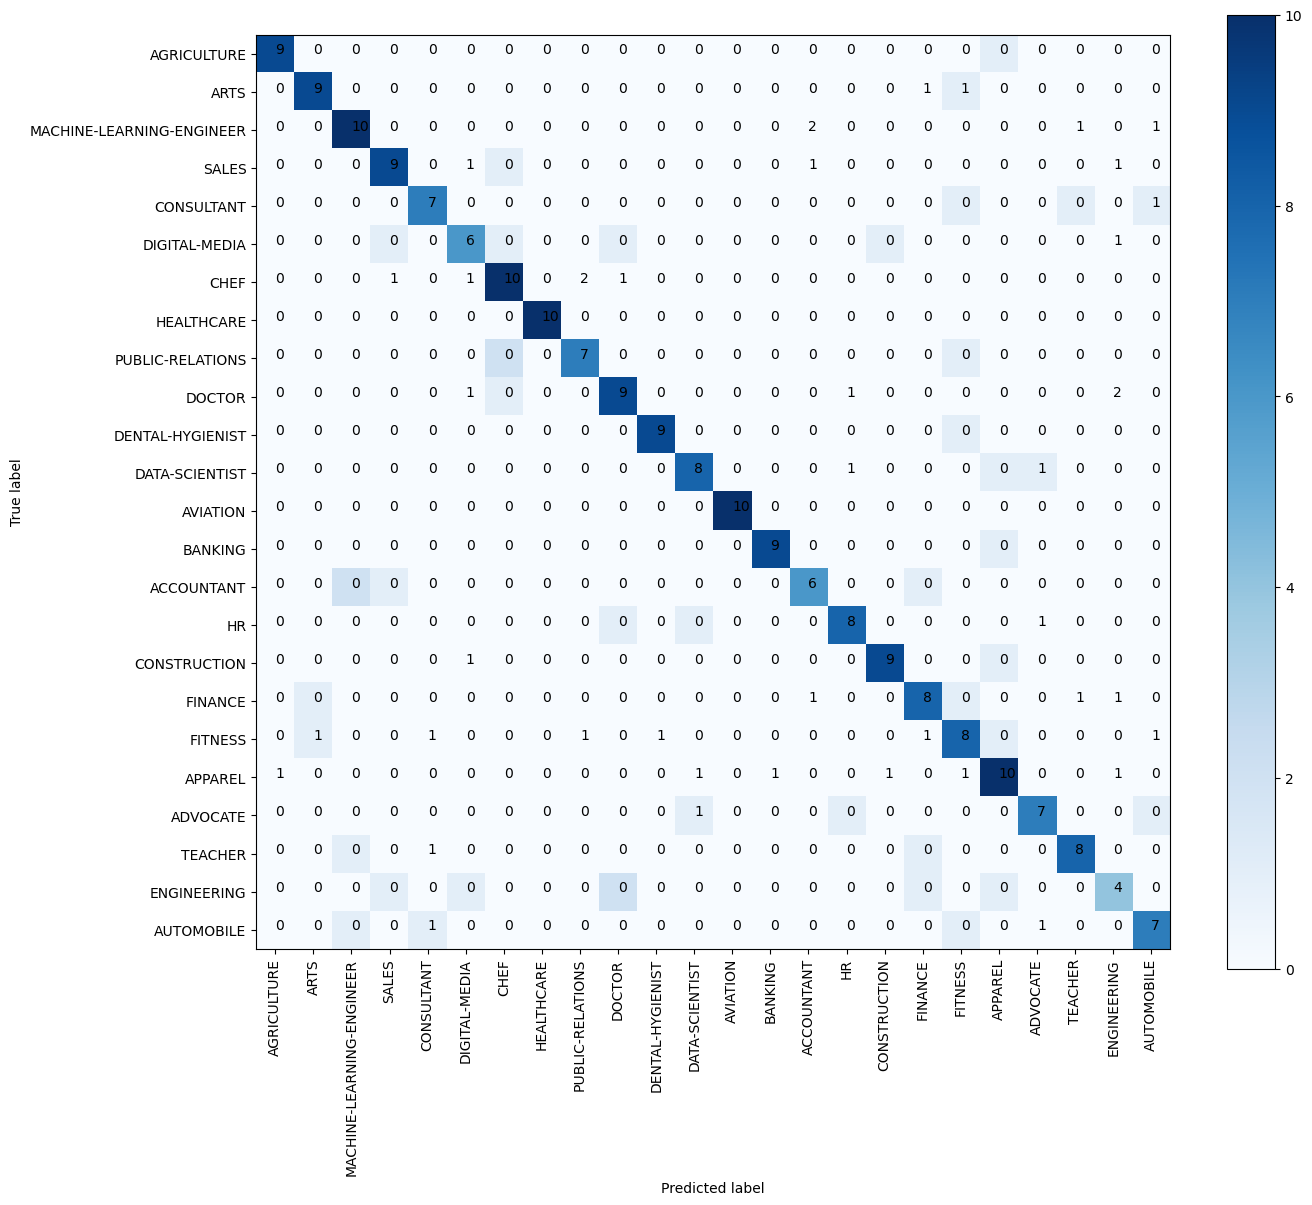

In [184]:
#Test NLP model accuracy using naivebayes for CountVectorize method
# # instantiate the vectorizer, learn training data vocabulary, then use it to create a document-term matrix

from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()

X_train1 = cvect.fit_transform(X_train)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test1 = cvect.transform(X_test)
X_full =  cvect.transform(X)

print(X_train1.toarray() )

#Use GaussianNB to train the data set
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputRegressor

nb = GaussianNB();
param_grid = {}
'''
{'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
              '''
nb_model = GridSearchCV(nb, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
#best_nb = MultiOutputRegressor(nb_model).fit(X_train1.toarray(), y_train)
best_nb = nb_model.fit(X_train1.toarray(), y_train)
#print('CountVectorize method for NLP', "\n", 
#                "BestScore: ", best_nb.best_score_, '\n',
#                 "Best parameters: ", best_nb.best_params_ )

# predicting test set results
y_pred1 = best_nb.predict(X_full.toarray())

print(y_full)
print(y_pred1)
# making the confusion matrix
EvaluateModel(y_full, y_pred1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[ 2  2  2  2  2  2  2  2  2  2  4 18  4  4  4  4  4  4 21 23 20 20 20 20
 20 20 20 15 23 11 22  3 22  9 19  9 22 22 17  5 10 10 10 10 18 10 10 10
 10 10 13 21 13 13 13 13 13 13 13 13  8  8  6  8  8  8  8 18  8  6 18 18
 18 19 18 18 18 18  1 18 21 21 21 21 21 17 21 21 21  2  2  2 14  3 14 17
 14 14 14 14 12 12 12 12 12 12 12 12 12 12 11 11 11 11 19 11 11 11 20 11
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  0  0  0  0
  0  0  0  0 19  0 19 19 19 19 19 19 19 19 19 19  9  9  6  9  9  9  9  9
  9  9 19 16 16 16 16 16 16 16 16 16 17  1 17 18 17 17 17 17 17 17  3  3
  3  3  3  3  3  3  6  3  1  1  1  1  1  1  1  1 18  1 23 23 23 23  2  2
 23 23 23 18 15 15 11 15 15 15 15 15  9 15  5  5  9  5  5  5  6  3  5 16]
              precision    recall  f1-score   support


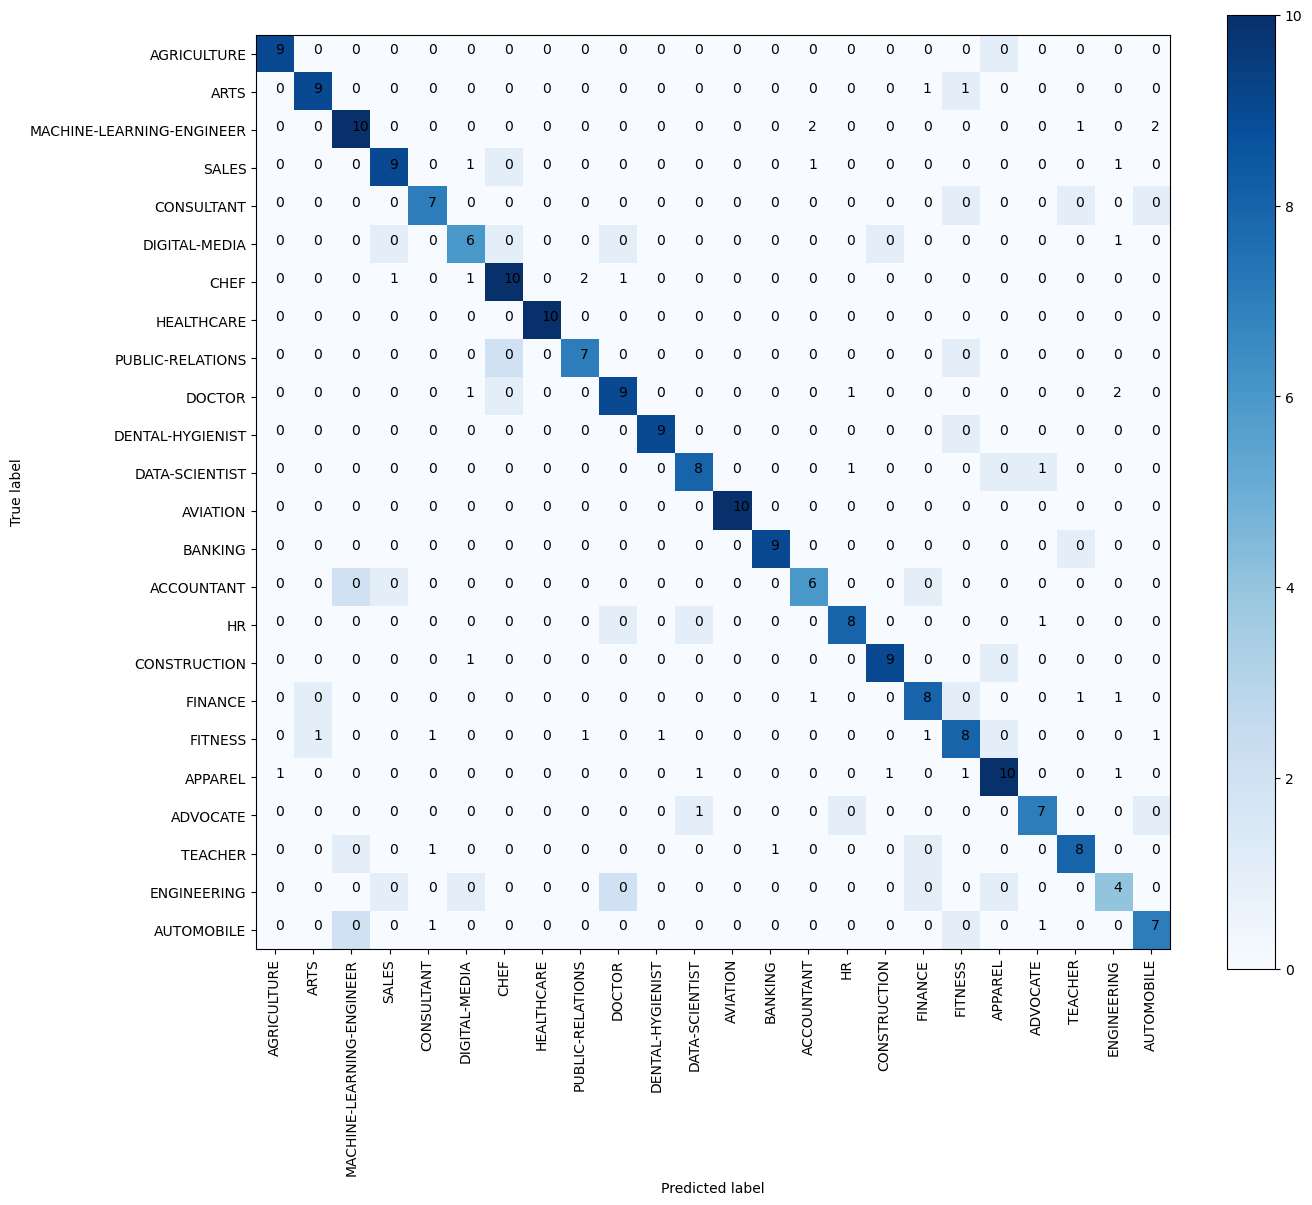

In [185]:
#Test NLP model accuracy using naivebayes for CountVectorize method
# # instantiate the vectorizer, learn training data vocabulary, then use it to create a document-term matrix

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvect = TfidfVectorizer()
X_train2 = Tfidfvect.fit_transform(X_train)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test2 = Tfidfvect.transform(X_test)

print(X_train2.toarray() )

#Use GaussianNB to train the data set
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputRegressor

nb2 = GaussianNB();
param_grid = {}
'''
{'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
              '''
nb_model2 = GridSearchCV(nb2, param_grid = param_grid, cv = 2, verbose = True, n_jobs = -1)
#best_nb = MultiOutputRegressor(nb_model).fit(X_train2.toarray(), y_train)
best_nb2 = nb_model2.fit(X_train2.toarray(), y_train)
#print('CountVectorize method for NLP', "\n", 
#                "BestScore: ", best_nb.best_score_, '\n',
#                 "Best parameters: ", best_nb.best_params_ )

# predicting test set results
y_pred2 = best_nb2.predict(X_full.toarray())

print(y_pred2)
# making the confusion matrix
EvaluateModel(y_full, y_pred2)

### The two approaches used to create independent column vectors from 
###  resume texts are CountVectorizer method and TfidfVectorizer method. Both methods yield a similar 
###  accuracy score, i.e. 83%